In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Pra


Mounted at /content/drive
/content/drive/MyDrive/Pra


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import cv2
import os

Class balance analysis
The dataframe can be used to analyze the distribution of the different classes in the dataset, which can be useful for understanding the balance of the dataset and determining if any classes are significantly over- or underrepresented.

In [ ]:
#directory = 'C:/Users/94718/OneDrive/Desktop/datathon/dataset'
directory ='/content/drive/MyDrive/Pra/image'
# get number of images for each class
num_acne = len(os.listdir(directory + '/Acne'))
num_cyst = len(os.listdir(directory + '/Cyst, tumour and skin-tags'))
num_melanoma = len(os.listdir(directory + '/Melanoma'))
num_normal = len(os.listdir(directory + '/Normal skin'))

# create a dataframe to store the data
df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin'],
                   'num_images': [num_acne, num_cyst, num_melanoma, num_normal]})

total number of images:  2300
acne: 400  cyst: 600  melanoma: 600  normal: 700


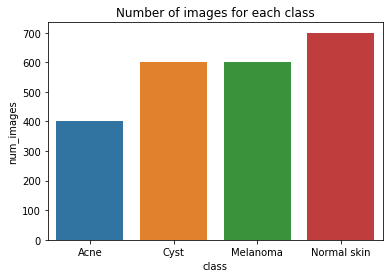

In [ ]:
print("total number of images: ", (num_acne + num_cyst+num_melanoma+num_normal))

# toatl number of images for each class
print('acne:', num_acne, ' cyst:', num_cyst, ' melanoma:', num_melanoma, ' normal:', num_normal)

# Use seaborn's barplot function to create a bar plot of the num_images column, grouped by the class column

sns.barplot(x='class', y='num_images', data=df)
plt.title('Number of images for each class')
plt.show()

Resolution accross classes
Now let's see the average images sizes for each classes.




In [ ]:
# scatter plot width and height for each class with tensorflow
import tensorflow as tf
import numpy as np

# get the image width and height for each class
def get_image_size(directory):
    width = []
    height = []
    for filename in os.listdir(directory):
        img = tf.io.read_file(directory + '/' + filename)
        img = tf.image.decode_jpeg(img, channels=3)
        width.append(img.shape[0])
        height.append(img.shape[1])
    return width, height


# get the image width and height for each class
acne_width, acne_height = get_image_size(directory + '/Acne')
cyst_width, cyst_height = get_image_size(
    directory + '/Cyst, tumour and skin-tags')
melanoma_width, melanoma_height = get_image_size(directory + '/Melanoma')
normal_width, normal_height = get_image_size(directory + '/Normal skin')
#moneypox_width, moneypox_height = get_image_size(directory + '/Moneypox')

# create a dataframe to store the data

df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin'],
                   'width': [np.mean(acne_width), np.mean(cyst_width), np.mean(melanoma_width), np.mean(normal_width)],
                   'height': [np.mean(acne_height), np.mean(cyst_height), np.mean(melanoma_height), np.mean(normal_height)]})

print(df)


         class       width       height
0         Acne  222.000000   294.000000
1         Cyst  225.565000   299.576667
2     Melanoma  931.735000  1234.233333
3  Normal skin  474.391429   591.082857


Based on the mean width and height values for each class, it appears that the size and resolution of the images vary significantly across the different classes. For example, the acne images are much smaller (222x294 pixels) than the melanoma images (931x1234 pixels).

Size and resolution of the images may affect the performance of the model. For example, a model trained on high-resolution images may not generalize well to low-resolution images, and vice versa. As a result, it may be necessary to adjust the model or the pre-processing steps accordingly in order to achieve good performance on the task.

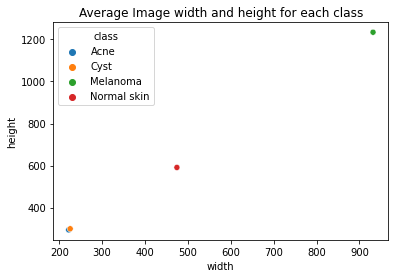

In [ ]:
# seaborn scatterplot
sns.scatterplot(x='width', y='height', hue='class', data=df)
plt.title('Average Image width and height for each class')
plt.show()

In [ ]:
# Create a DataFrames for each classes, data using the class_width and class_height lists

df_acne = pd.DataFrame({'width': acne_width, 'height': acne_height})
df_cyst = pd.DataFrame({'width': cyst_width, 'height': cyst_height})
df_melanoma = pd.DataFrame({'width': melanoma_width, 'height': melanoma_height})
df_normal = pd.DataFrame({'width': normal_width, 'height': normal_height})

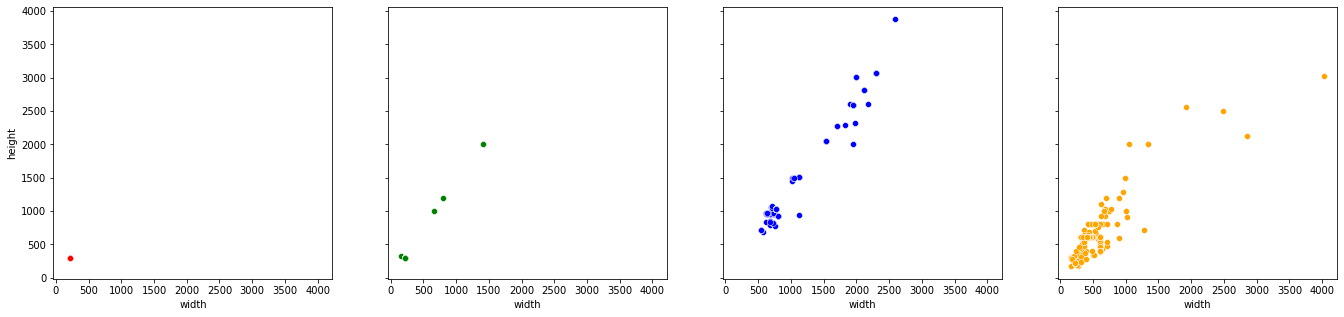

In [ ]:
# Create a figure and subplots with 1 row and 5 columns
fig, ax = plt.subplots(1, 4, figsize=(23, 5), sharey=True, sharex=True)


# Use seaborn's scatterplot function to create a scatter plot of the width and height columns in the df_class DataFrame
sns.scatterplot(ax=ax[0], data=df_acne, x="width", y="height", color='red')
sns.scatterplot(ax=ax[1], data=df_cyst, x="width", y="height", color='green')
sns.scatterplot(ax=ax[2], data=df_melanoma,x="width", y="height", color='blue')
sns.scatterplot(ax=ax[3], data=df_normal, x="width",y="height", color='orange')

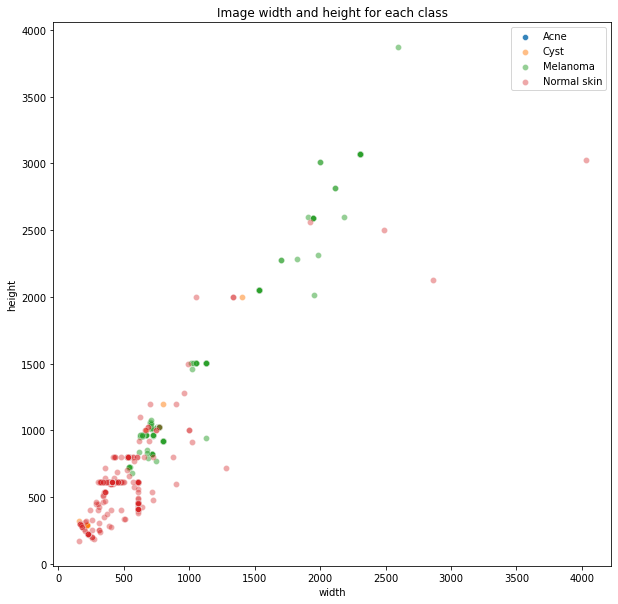

In [ ]:
# seaborn scatterplot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_acne, x="width", y="height", alpha=0.9,)
sns.scatterplot(data=df_cyst, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_melanoma, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_normal, x="width", y="height", alpha=0.4)
#sns.scatterplot(data=df_moneypox, x="width", y="height", alpha=0.2)

plt.title('Image width and height for each class')
plt.legend(['Acne', 'Cyst', 'Melanoma', 'Normal skin'])


It seams that acne class has a image count and has a low image resolution than all other classes.

The code below checks for any corrupted images in the 'datathon 2022 dataset' directory and its subdirectories. It does this by using the Python Pillow library to open each image and attempt to read the first pixel of the image data. If this operation fails, it indicates that the image is corrupted.

In [ ]:
directory = 'image'
# ims = 256
image_size = (256, 256)
# Generates a tf.data.Dataset from image files in a directory.
df = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation='lanczos5',
    crop_to_aspect_ratio=False,
)
class_names = df.class_names

Found 2285 files belonging to 4 classes.


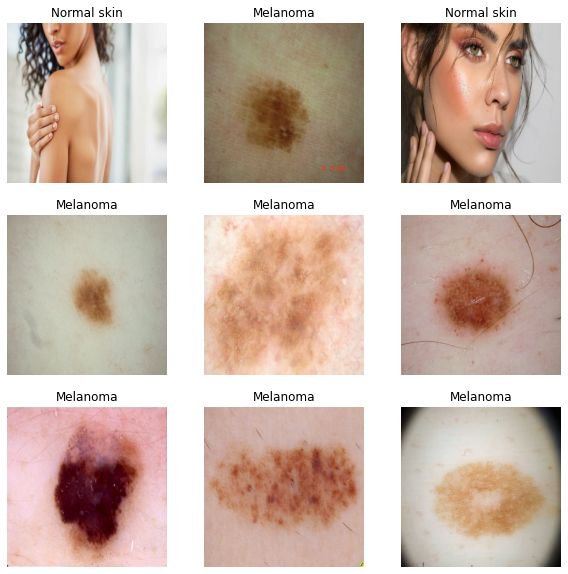

In [ ]:
plt.figure(figsize=(10, 10))

# Loop through the first batch of images and labels in the df DataFrame
for images, labels in df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Display the image using imshow and convert the image data to unsigned 8-bit integers
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

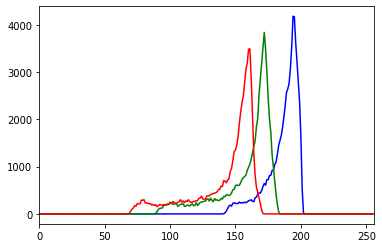

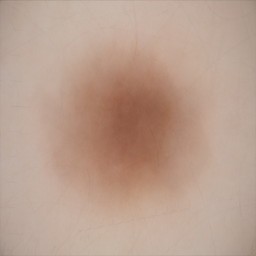

In [ ]:
# Create a dataset of melanoma images from the df dataset
melanoma_test_ds = df.unbatch().filter(lambda image, label: label == 2).batch(32)

# Define a function that calculates and plots a color histogram for an image
def get_image_histogram(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

# Iterate through the melanoma images and blend them together using averaging
for images, labels in melanoma_test_ds.take(1):
    first = Image.fromarray(images[0].numpy().astype("uint8"))
    a = 1
    for i in range(1, len(images)):
        img = images[i].numpy()
        first += img
        a+=1

# Divide the blended image by the number of images to get the average
first = first/a
blended_image = Image.fromarray(first.astype("uint8"))  
get_image_histogram(first)
blended_image
